<a href="https://colab.research.google.com/github/NITIN9694/TensorFlow-Learning/blob/main/06_Transfer_Learning_2_(Fine_Tuning)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Transfer Learning with tesnsroflow part 2 : Fine Tuning

in the previous notebook , we covered transfer learning feature extraction now we cover new kind of tranfer learning :fine truning


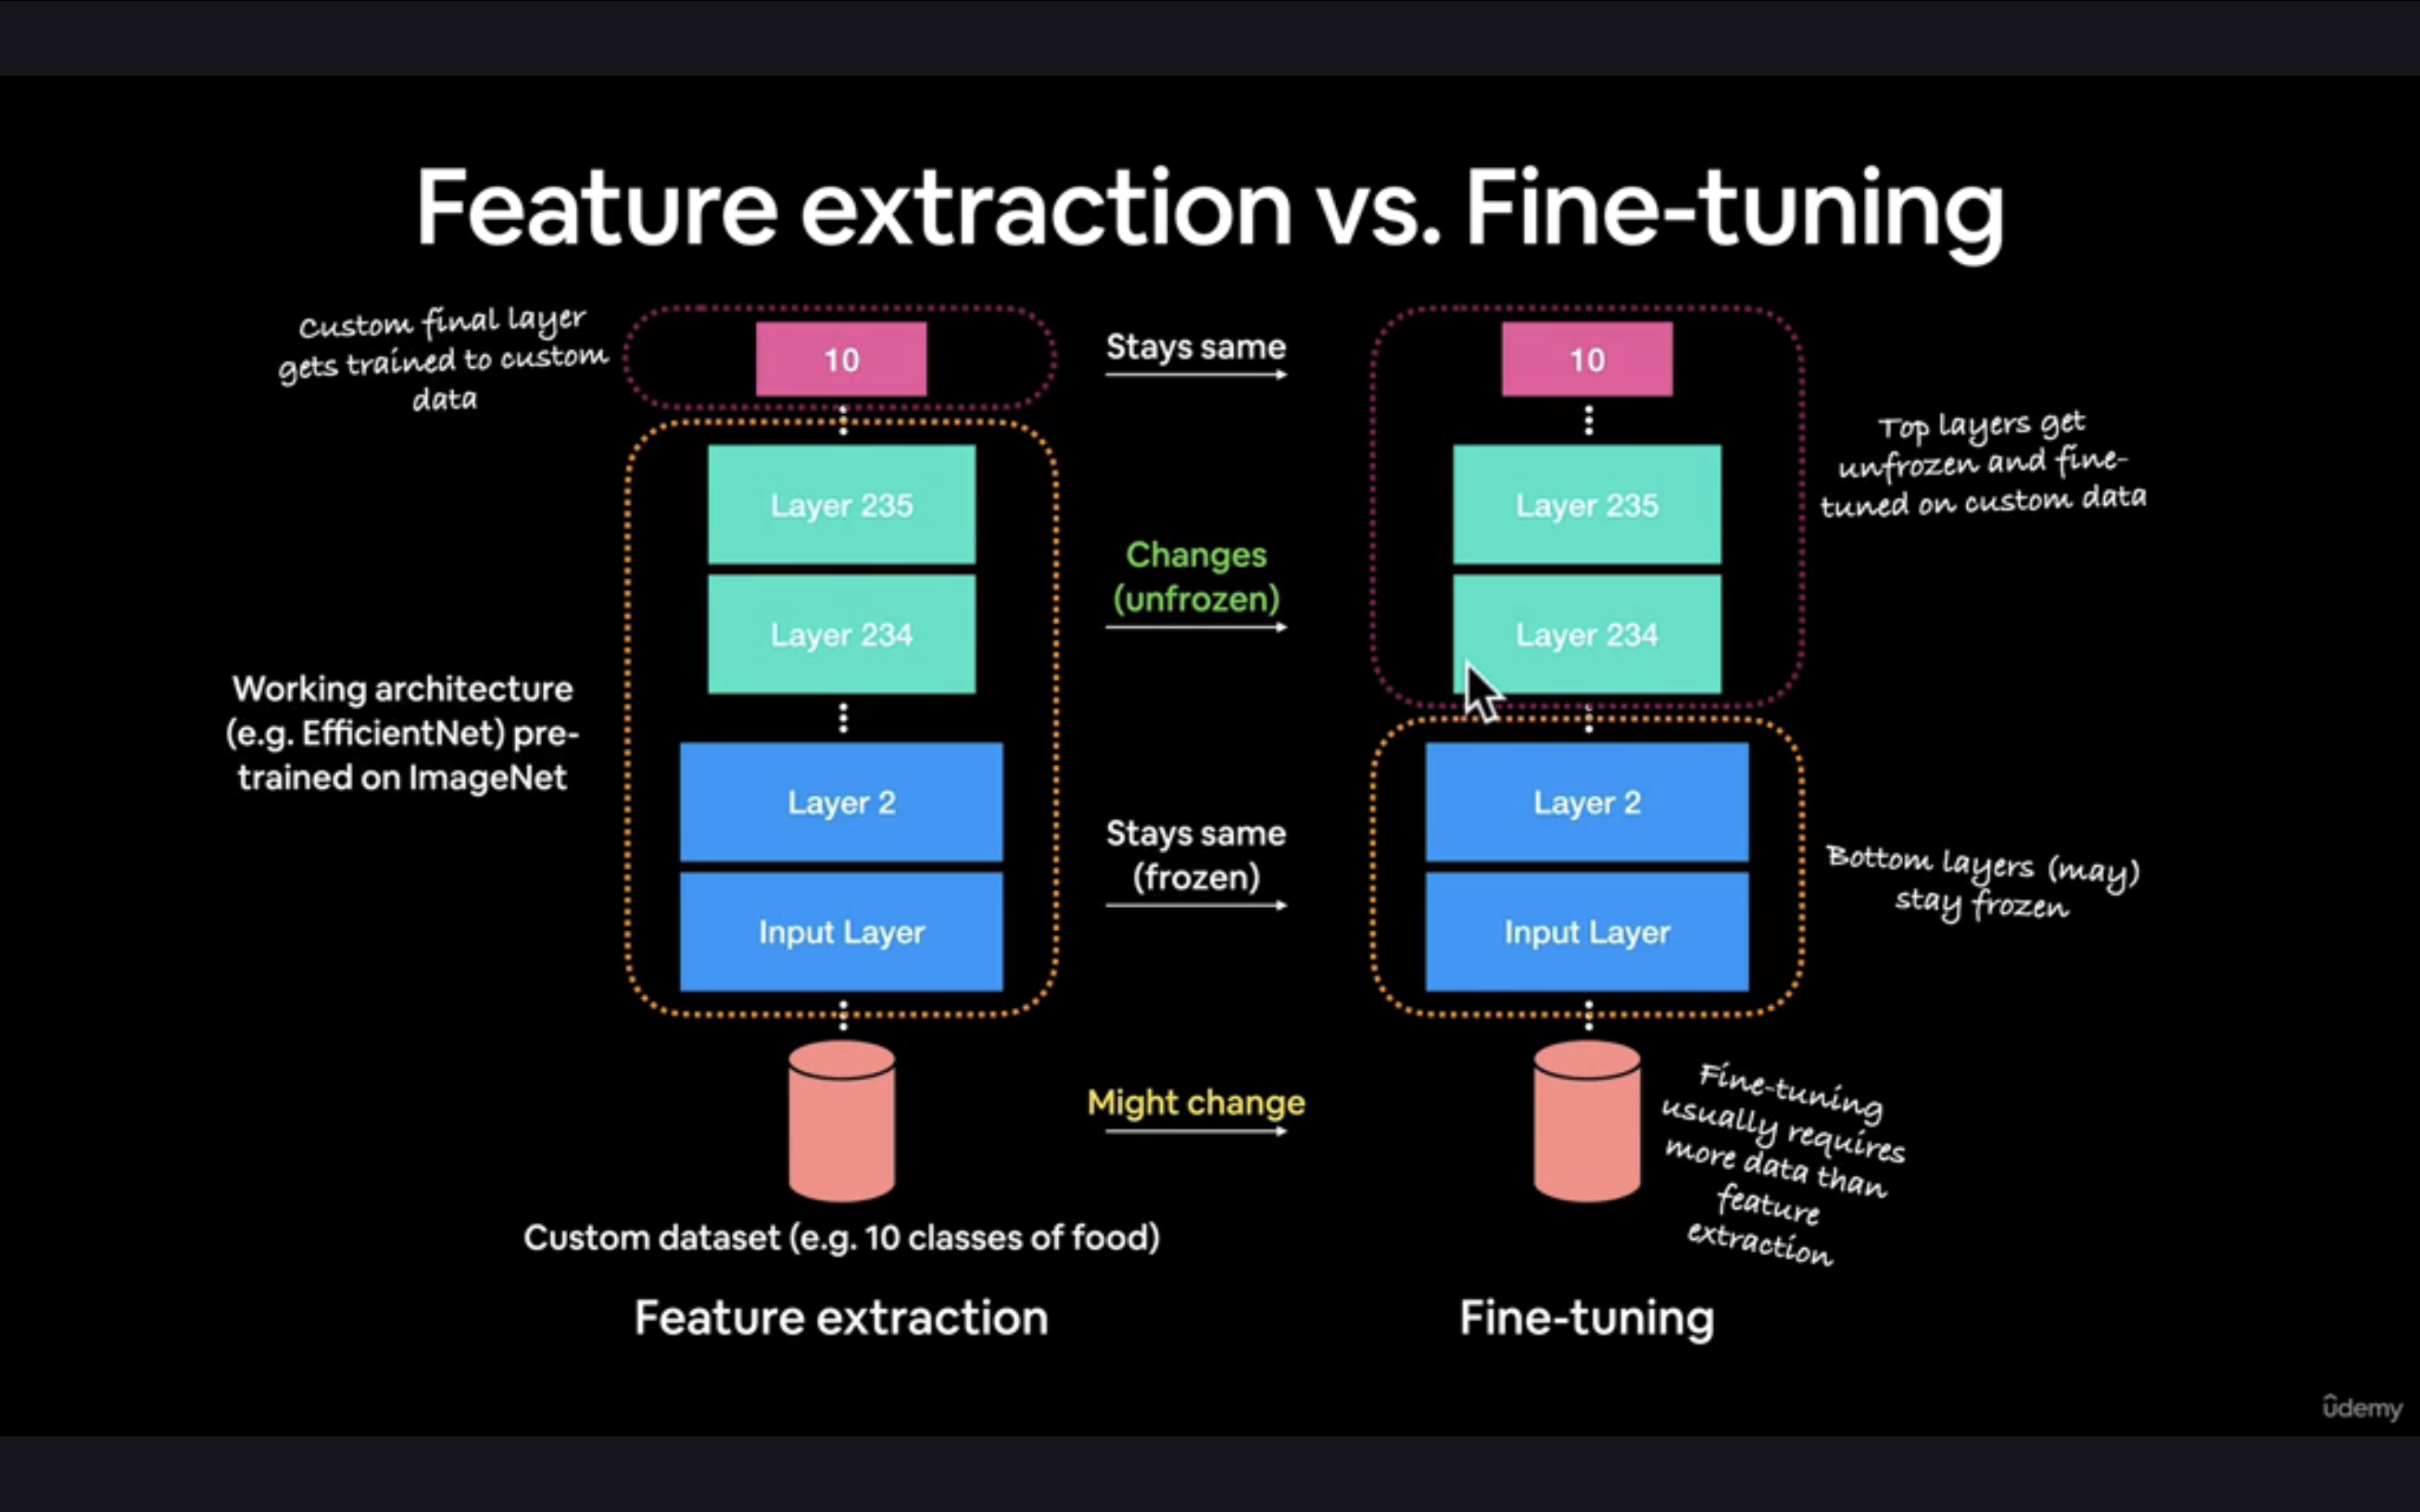

In [1]:
#check which GPU we'r using
!nvidia-smi

Tue Sep  2 18:19:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2025-09-02 18:19:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-09-02 18:19:18 (14.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves , unzip_data , walk_through_dir

### Let's Get some data
This time we are going to see how we can trained model with keras.application.data for our own problem ( recognizing image of food  ).

In [4]:
#Get 10% of training data of 10 classes of Food101

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2025-09-02 18:19:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   261MB/s    in 0.6s    

2025-09-02 18:19:24 (261 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
#check how many images are subdirectories are in our dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [6]:
#creating train and test directory paths
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"


In [7]:
import tensorflow as tf

IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
 directory = train_dir,
 image_size =  IMG_SIZE,
 batch_size =  BATCH_SIZE )

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
  directory = test_dir,
  image_size = IMG_SIZE,
  batch_size = BATCH_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
#checkout class name of dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

###Model 0: Building a transfer learning module using keras funcation API

The Sequential API is straight-forwoard, it runs layers in Sequential order.
But the funcational api gives us more flexibilty with our model

In [9]:
#1. Create base model with tf.keras.application
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#2. Freeze the base model
base_model.trainable = False

#3. Create input into model
input = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

#4.pass the input layers
x = base_model(input)

#5. Average pool the output of the model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#6. Create the output activation layer
output = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

#7. Combine input with the output into model

model_0 = tf.keras.Model(input,output)


#8. compile model

#9. fit the model

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
